In [1]:
from keras.datasets import mnist
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

In [29]:
(x_Train, y_Train), (x_Test, y_Test) = mnist.load_data()

In [26]:
x_Train4D = x_Train.reshape(x_Train.shape[0],28,28,1).astype('float32')
# print(x_Train.shape)
print(x_Train4D[0])
x_Test4D = x_Test.reshape(x_Test.shape[0],28,28,1).astype('float32')

[[[  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]]

 [[  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]]

 [[  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]]

 [[  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [ 

In [4]:
x_Train4D_normalize = x_Train4D / 255
x_Test4D_normalize = x_Test4D / 255

In [27]:
y_TrainOneHot = np_utils.to_categorical(y_Train)
y_TestOneHot = np_utils.to_categorical(y_Test)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [7]:
model = Sequential()

2022-11-16 16:48:40.954391: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
model.add(Conv2D(filters=16, kernel_size=(5,5), padding='same', input_shape=(28,28,1), activation='relu'))

In [9]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [10]:
model.add(Conv2D(filters=36, kernel_size=(5,5), padding='same', activation='relu'))

In [11]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [12]:
model.add(Dropout(0.25))

In [13]:
model.add(Flatten())

In [14]:
model.add(Dense(128, activation='relu'))

In [15]:
model.add(Dropout(0.5))

In [16]:
model.add(Dense(10, activation='softmax'))

In [17]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 36)        14436     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 36)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 7, 7, 36)          0         
                                                                 
 flatten (Flatten)           (None, 1764)              0

In [18]:
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

In [19]:
train_history = model.fit(x=x_Train4D_normalize, y=y_TrainOneHot, validation_split=0.2, epochs=10, batch_size=300, verbose=2)

Epoch 1/10
160/160 - 34s - loss: 0.5161 - accuracy: 0.8387 - val_loss: 0.1025 - val_accuracy: 0.9688 - 34s/epoch - 210ms/step
Epoch 2/10
160/160 - 34s - loss: 0.1375 - accuracy: 0.9581 - val_loss: 0.0621 - val_accuracy: 0.9813 - 34s/epoch - 215ms/step
Epoch 3/10
160/160 - 32s - loss: 0.0975 - accuracy: 0.9705 - val_loss: 0.0480 - val_accuracy: 0.9859 - 32s/epoch - 201ms/step
Epoch 4/10
160/160 - 33s - loss: 0.0819 - accuracy: 0.9758 - val_loss: 0.0487 - val_accuracy: 0.9857 - 33s/epoch - 205ms/step
Epoch 5/10
160/160 - 33s - loss: 0.0681 - accuracy: 0.9797 - val_loss: 0.0407 - val_accuracy: 0.9880 - 33s/epoch - 208ms/step
Epoch 6/10
160/160 - 33s - loss: 0.0608 - accuracy: 0.9818 - val_loss: 0.0397 - val_accuracy: 0.9887 - 33s/epoch - 203ms/step
Epoch 7/10
160/160 - 38s - loss: 0.0544 - accuracy: 0.9835 - val_loss: 0.0368 - val_accuracy: 0.9908 - 38s/epoch - 238ms/step
Epoch 8/10
160/160 - 38s - loss: 0.0480 - accuracy: 0.9853 - val_loss: 0.0325 - val_accuracy: 0.9906 - 38s/epoch - 238

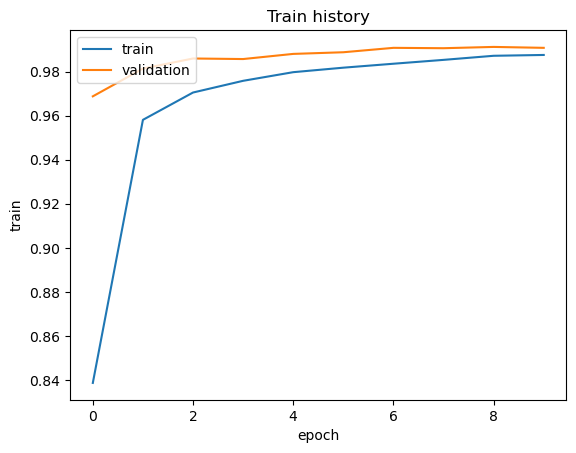

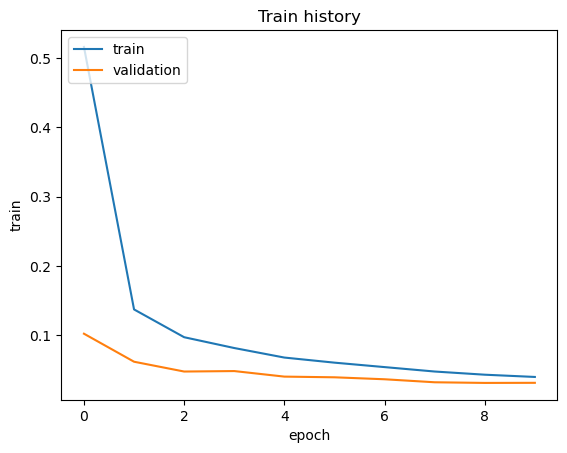

In [20]:
import matplotlib.pyplot as plt

def show_train_history(train_history,train,validation):

  plt.plot(train_history.history[train])
  plt.plot(train_history.history[validation])
  plt.title('Train history')
  plt.ylabel('train')
  plt.xlabel('epoch')

  # 設置圖例在左上角
  plt.legend(['train','validation'],loc='upper left')
  plt.show()
# overfitting
show_train_history(train_history,'accuracy','val_accuracy')
show_train_history(train_history,'loss','val_loss')

In [21]:
scores = model.evaluate(x_Test4D_normalize, y_TestOneHot)
scores[1]

313/313 [==============================] - 3s 9ms/step - loss: 0.0216 - accuracy: 0.9918


0.9918000102043152

In [34]:
# 預測
# prediction = model.predict_classes(x_Test4D_normalize)
predict_x=model.predict(x_Test4D_normalize) 
prediction=np.argmax(predict_x,axis=1)
prediction[:10]

313/313 [==============================] - 3s 9ms/step


array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [23]:
import matplotlib.pyplot as plt
def plot_image(image):
    fig = plt.gcf()
    fig.set_size_inches(2,2)
    plt.imshow(image, cmap='binary')
    plt.show()
    
def plot_images_labels_prediction(images, labels, prediction, idx, num=10):
    fig = plt.gcf()
    fig.set_size_inches(12,14)
    if num>25: 
        num=25
    for i in range(0, num):
        ax= plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        title = "label=" + str(labels[idx])
        if len(prediction)>0:
            title+=",predict="+str(prediction[idx])
            
        ax.set_title(title,fontsize=10)
        ax.set_xticks([]);
        ax.set_yticks([])
        idx+=1
    plt.show()

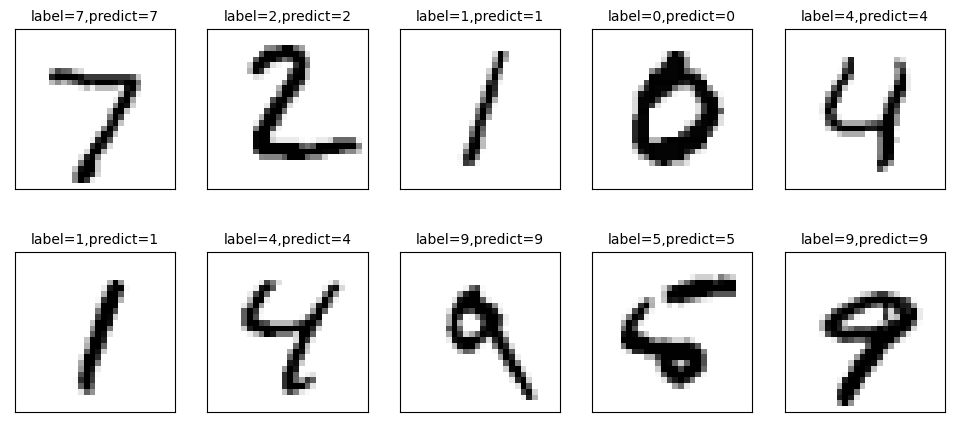

In [35]:
plot_images_labels_prediction(x_Test, y_Test, prediction, idx=0)

In [25]:
import pandas as pd
pd.crosstab(y_Test, prediction, rownames=['label'], colnames=['predict'])

predict    0     1     2     3    4    5    6     7    8    9
label                                                        
0        976     1     0     0    0    0    2     1    0    0
1          0  1132     1     1    0    1    0     0    0    0
2          1     0  1028     0    0    0    0     3    0    0
3          0     0     1  1001    0    3    0     3    2    0
4          0     0     0     0  976    0    1     0    0    5
5          2     0     0     4    0  883    1     1    0    1
6          5     2     0     0    1    1  948     0    1    0
7          0     1     2     1    0    0    0  1022    0    2
8          3     0     2     1    0    1    0     2  963    2
9          2     3     2     0    7    3    0     2    1  989